In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [65]:
datos = pd.read_csv('datos.csv', delimiter=';')
datos

,V (Volts),I (Amperes),Rad (mV),Res (kOhm)
0,0.000,0.00,0.0,7.50
1,1.002,0.95,0.2,7.50
2,2.012,1.23,0.4,7.52
3,3.001,1.48,1.0,7.54
4,4.000,1.70,1.8,7.57
5,5.000,1.90,2.7,7.61
6,6.000,2.09,3.7,7.65
7,7.000,2.26,4.9,7.71
8,8.000,2.43,6.0,7.76
9,9.000,2.58,7.4,7.82


In [66]:
coef_tungsteno = 0.0045

def resistencia(voltaje, corriente):
    return voltaje / corriente
def temperatura(r, r_ref, coef_tungsteno, t_ref):
    return ((r - r_ref) / (coef_tungsteno * r_ref) + t_ref)
def temperatura_4(temperatura):
    return temperatura ** 4

t_ref = 300
r_ref = 1.0

In [67]:
datos['Resistencia'] = resistencia(datos['V (Volts)'], datos['I (Amperes)'])
datos['Resistencia'].iloc[0] = 1.0
datos['Temperaturas (K)'] = temperatura(datos['Resistencia'], r_ref, coef_tungsteno, t_ref)
datos['Temperaturas (°C)'] = datos['Temperaturas (K)'] - 273
datos['T^4 (K^4)'] = temperatura_4(datos['Temperaturas (K)'])
datos['T^4 (°C^4)'] = temperatura_4(datos['Temperaturas (°C)'])
datos

,V (Volts),I (Amperes),Rad (mV),Res (kOhm),Resistencia,Temperaturas (K),Temperaturas (°C),T^4 (K^4),T^4 (°C^4)
0,0.000,0.00,0.0,7.50,1.000000,300.000000,27.000000,8.100000e+09,5.314410e+05
1,1.002,0.95,0.2,7.50,1.054737,312.163743,39.163743,9.495762e+09,2.352539e+06
2,2.012,1.23,0.4,7.52,1.635772,441.282746,168.282746,3.791995e+10,8.019704e+08
3,3.001,1.48,1.0,7.54,2.027703,528.378378,255.378378,7.794354e+10,4.253403e+09
4,4.000,1.70,1.8,7.57,2.352941,600.653595,327.653595,1.301656e+11,1.152550e+10
5,5.000,1.90,2.7,7.61,2.631579,662.573099,389.573099,1.927237e+11,2.303328e+10
6,6.000,2.09,3.7,7.65,2.870813,715.736310,442.736310,2.624292e+11,3.842205e+10
7,7.000,2.26,4.9,7.71,3.097345,766.076696,493.076696,3.444205e+11,5.910958e+10
8,8.000,2.43,6.0,7.76,3.292181,809.373571,536.373571,4.291371e+11,8.276934e+10
9,9.000,2.58,7.4,7.82,3.488372,852.971576,579.971576,5.293443e+11,1.131428e+11


In [45]:
ajuste = np.polyfit(datos['Rad (mV)'], datos['T^4'], 1)
ajuste

array([ 1.90627748e+10, -1.73812617e+10])

In [77]:
def ajuste_lineal(rad):
    return  1.90627748e+10 * rad - 1.73812617e+10

spear1 = stats.spearmanr(datos['T^4 (°C^4)'], ajuste_lineal(datos['Rad (mV)']))[0]
pear1 = stats.pearsonr(datos['T^4 (°C^4)'], ajuste_lineal(datos['Rad (mV)']))[0]
print("Correlacion de Spearman: {} \nCorrelacion de Pearson: {}".format(
    spear1, pear1
))

Correlacion de Spearman: 1.0 
Correlacion de Pearson: 0.9846855666788022


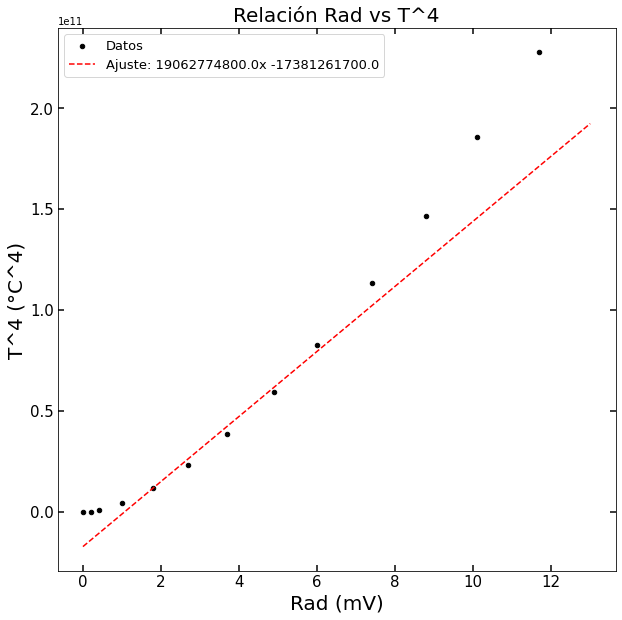

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(datos['Rad (mV)'], datos['T^4'], s=20, c='black', label='Datos')
ax.plot(np.linspace(0, 13), ajuste_lineal(np.linspace(0, 11)),'--',c='red', label='Ajuste: {}x {}'.format(
    1.90627748e+10, - 1.73812617e+10
))
ax.set_xlabel('Rad (mV)', fontsize=20)
ax.set_ylabel('T^4 (°C^4)', fontsize=20)
ax.set_title('Relación Rad vs T^4', fontsize=20)
ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1)
ax.legend(fontsize=13)